In [1]:
import pandas as pd
from management.sales import SalesManagement
from management.inventory import InventoryManagement

Initial all the data file

In [2]:
def clear_csv_file(file_path):
    # Read the CSV file, keeping only the column names
    df = pd.read_csv(file_path, nrows=0)
    # Overwrite the file, writing only the column names
    df.to_csv(file_path, index=False)

clear_csv_file("orders.csv")
inventory_file = "inventory.csv"
remaining_productivity_file = "remaining_productivity.csv"
extra_productivity_file = "extra_productivity.csv"
order_file = "orders.csv"
fruit_file = "fruits.csv"
plantation_file = "plantation.csv"

Create an InventoryManagement instance

In [3]:
inventory_manager = InventoryManagement(extra_productivity_file, remaining_productivity_file, inventory_file, plantation_file, fruit_file)

Create a SalesManagement instance and pass the InventoryManagement instance to it

In [4]:
sales_manager = SalesManagement(inventory_manager, order_file)

Checks if selling a specified quantity of fruits is possible

In [5]:
sales_manager.check_inventory('Ambrosia', 3)

   index  Ambrosia  Gala  Honeycrisp  Lapins  Sweetheart  Skeena  Redhaven  \
4      5       300   300         300     500           0       0         0   

   Elberta  Cresthaven  
4      400           0  
300
Inventory of Ambrosia is enough for this order.


Add some orders, including picking and selling types

In [6]:
sales_manager.add_order('selling', 'Ambrosia', 50)
sales_manager.add_order('selling', 'Elberta', 50)
sales_manager.add_order('picking', 'Lapins', 40)

Display order data

In [7]:
sales_manager.order_display()

  index sales_type fruit_type fruit_variety weight  unit_price  revenue
0     1    selling          1      Ambrosia     50        1.20     60.0
1     2    selling          3       Elberta     50        1.20     60.0
2     3    picking          2        Lapins     40        2.99    119.6


Display total revenue grouped by 'sales_type'

In [8]:
sales_manager.revenue_display('sales_type')

  sales_type  revenue
0    picking    119.6
1    selling    120.0


Display total revenue grouped by 'fruit_type'

In [9]:
sales_manager.revenue_display('fruit_type')

   fruit_type  revenue
0           1     60.0
1           2    119.6
2           3     60.0


Display a pie chart of revenue distribution by 'fruit_type'

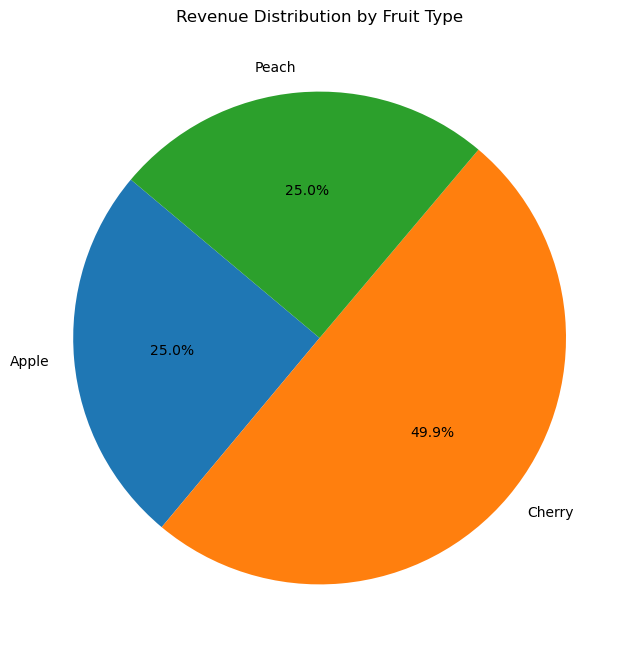

In [10]:
sales_manager.revenue_plotter()